In [1]:
from fastai.conv_learner import *
from tools.data_wrangling import folders_to_csv

In [2]:
PATH = 'data/plant-seedlings-classification/'
label_csv = os.path.join(PATH, 'labels.csv')
train_path = os.path.join(PATH, 'train')

![folder_training_style](../pictures/plant-seedlings-classification/folder_style.png)

In [3]:
folders_to_csv(train_path, label_csv)

label.csv already exists - exiting


![csv_training_style](../pictures/plant-seedlings-classification/csv_style.png)

In [4]:
sz = 224
arch = resnet50
bs = 64

In [5]:
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [6]:
def get_data(sz, bs, arch, label_csv):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', label_csv, test_name='test',
                                        val_idxs=val_idxs, tfms=tfms, bs=bs)
    return data.resize(int(sz*1.3)) if sz > 300 else data.resize(340, 'tmp')

In [7]:
data = get_data(sz, bs, arch, label_csv)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

![cached pictures](../pictures/plant-seedlings-classification/cached_pictures.png)

In [8]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/nathan/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:24<00:00, 4104888.06it/s]


100%|██████████| 13/13 [00:03<00:00,  4.01it/s]


initial training for the newly added layer - don't want to mess it up

In [10]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 52%|█████▏    | 31/60 [00:01<00:01, 26.57it/s, loss=25.9]


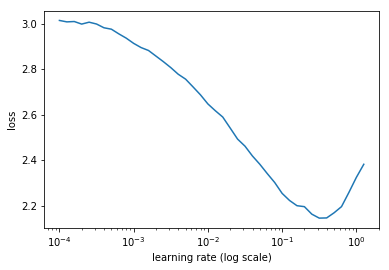

In [11]:
learn.sched.plot()

In [12]:
learn.fit(.01, n_cycle=4, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

epoch:   0, train_loss: 1.328901, val_loss: 0.851636, accuracy: 0.747106
epoch:   1, train_loss: 0.916163, val_loss: 0.573404, accuracy: 0.804784
epoch:   2, train_loss: 0.643873, val_loss: 0.516485, accuracy: 0.827238
epoch:   3, train_loss: 0.559446, val_loss: 0.464001, accuracy: 0.836613
epoch:   4, train_loss: 0.453218, val_loss: 0.424326, accuracy: 0.848264
epoch:   5, train_loss: 0.374603, val_loss: 0.402654, accuracy: 0.855556
epoch:   6, train_loss: 0.334852, val_loss: 0.405830, accuracy: 0.849113
epoch:   7, train_loss: 0.346431, val_loss: 0.403261, accuracy: 0.848264
epoch:   8, train_loss: 0.310941, val_loss: 0.379780, accuracy: 0.860764
epoch:   9, train_loss: 0.280697, val_loss: 0.374984, accuracy: 0.860571
epoch:  10, train_loss: 0.238381, val_loss: 0.370905, accuracy: 0.863889
epoch:  11, train_loss: 0.209465, val_loss: 0.363857, accuracy: 0.859722
epoch:  12, train_loss: 0.180909, val_loss: 0.355456, accuracy: 0.869290
epoch:  13, train_loss: 0.166155, val_loss: 0.35429

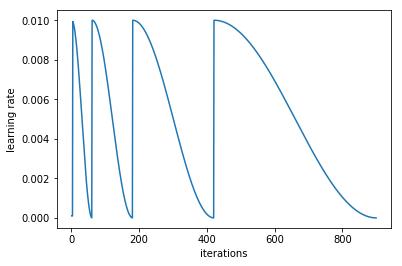

In [13]:
learn.sched.plot_lr()

In [ ]:
learn.precompute = False
learn.fit(lr, n_cycle=3, cycle_len=1, cycle_mult=2)